In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.dates as mdates
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, TimeDistributed

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
df = pd.read_csv('data/Index2018.csv')
df

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


## Plot of different time-series of markets

In [3]:
# Column date transform to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.900000,2224.95,3445.980000,18124.01
1,1994-01-10,475.270000,2225.00,3440.580000,18443.44
2,1994-01-11,474.130000,2228.10,3413.770000,18485.25
3,1994-01-12,474.170000,2182.06,3372.020000,18793.88
4,1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,2018-01-23,2839.130362,13559.60,7731.827774,24124.15
6265,2018-01-24,2837.544008,13414.74,7643.428966,23940.78
6266,2018-01-25,2839.253031,13298.36,7615.839954,23669.49
6267,2018-01-26,2872.867839,13340.17,7665.541292,23631.88


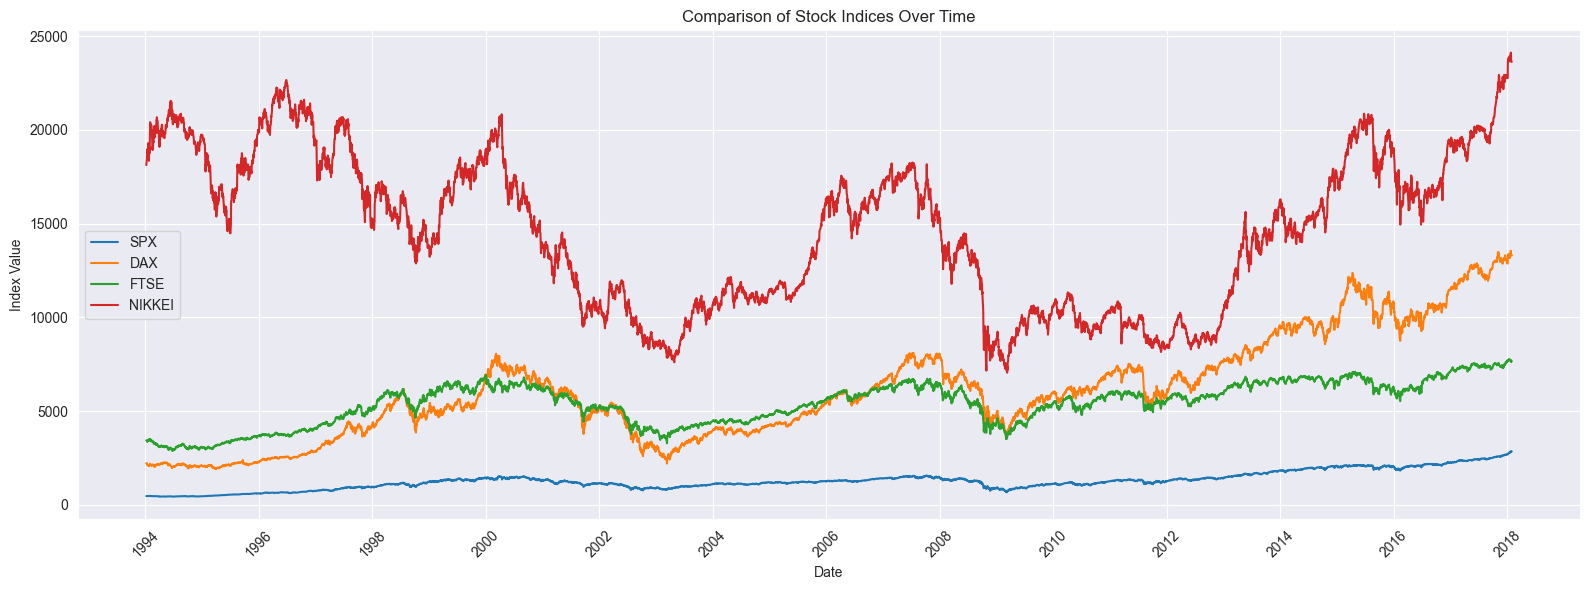

In [4]:
# Show time-series
plt.figure(figsize=(16, 6))
sns.lineplot(data=df, x='date', y='spx', label='SPX')
sns.lineplot(data=df, x='date', y='dax', label='DAX')
sns.lineplot(data=df, x='date', y='ftse', label='FTSE')
sns.lineplot(data=df, x='date', y='nikkei', label='NIKKEI')

plt.gca().xaxis.set_major_locator(mdates.YearLocator(2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.title('Comparison of Stock Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
model = ARIMA(df['spx'], order=(1, 1, 1))
model_fitted = model.fit()
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    spx   No. Observations:                 6269
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -25221.690
Date:                Tue, 21 Jan 2025   AIC                          50449.379
Time:                        20:28:40   BIC                          50469.609
Sample:                             0   HQIC                         50456.389
                               - 6269                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6477      0.061     10.608      0.000       0.528       0.767
ma.L1         -0.7030      0.056    -12.508      0.000      -0.813      -0.593
sigma2       183.0727      1.746    104.860      0.000     179.651     186.494
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              7007.44
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [6]:
df = df.set_index('date')
df = df.loc[:'2018-02-01']
df = df.asfreq('D')
df['spx']

date
1994-01-07     469.900000
1994-01-08            NaN
1994-01-09            NaN
1994-01-10     475.270000
1994-01-11     474.130000
                 ...     
2018-01-25    2839.253031
2018-01-26    2872.867839
2018-01-27            NaN
2018-01-28            NaN
2018-01-29    2853.528411
Freq: D, Name: spx, Length: 8789, dtype: float64

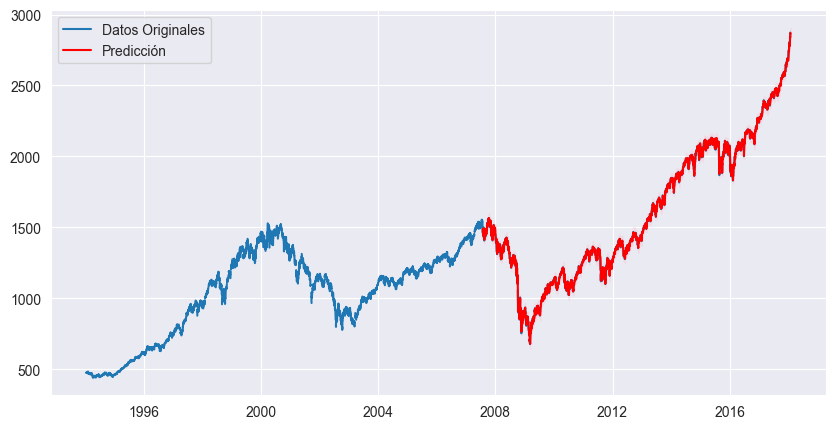

In [10]:

start_date = df.index[-3840]
end_date = df.index[-1]  
prediction = model_fitted.get_prediction(start=start_date, end=end_date)
prediction_mean = prediction.predicted_mean
prediction_conf_int = prediction.conf_int()

plt.figure(figsize=(10, 5))
plt.plot(df['spx'], label='Datos Originales')
plt.plot(prediction_mean.index, prediction_mean, label='Predicción', color='red')
plt.fill_between(prediction_conf_int.index, prediction_conf_int.iloc[:, 0], prediction_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()
